## <u>E-commerce Data</u>

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

### Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides    

### <u>Purpose of the EDA</u>:

- 🗺️ **Explore**: Negative order quantities indicate returns. Which products have been returned the most?
- 📊 **Visualize**: Create a plot visualizing the profits earned from UK customers weekly, monthly, and quarterly.
- 🔎 **Analyze**: Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

**Scenario Challenge:**

You are working for an online retailer. Currently, the retailer sells over 4000 unique products. 
To take inventory of the items, 
your manager has asked you whether you can group the products into a small number of categories. 
The categories should be similar in terms of price and quantity sold and any other characteristics 
you can extract from the data.

You will need to prepare a report that is accessible to a broad audience. 
It should outline your motivation, steps, findings, and conclusions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
orders = pd.read_excel(r'C:\Users\Michelle\Documents\Datasets\Retail EDA\Online Retail.xlsx')
orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**<u>1. Data Understanding</u>**
- Checking the shape of the dataframe
- Generate an overview of the dataframe
- Checking the data for null values
- Check if the rows are duplicated in the dataframe
- Understand how the data is distributed

In [4]:
orders.shape

(541909, 8)

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
orders.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
0 in orders.values

True

In [8]:
# Count number of zeros in all columns of Dataframe
for column_name in orders.columns:
    column = orders[column_name]
    # Get the count of Zeros in column 
    zero_count = (column == 0).sum()
    print(f"{column_name}:{zero_count}")

InvoiceNo:0
StockCode:0
Description:0
Quantity:0
InvoiceDate:0
UnitPrice:2515
CustomerID:0
Country:0


In [9]:
# Check for negative values
(orders.select_dtypes(np.number) < 0).sum()

Quantity      10624
UnitPrice         2
CustomerID        0
dtype: int64

In [10]:
orders[orders.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


**Observations:**
- There are missing values in the Description and CustomerID columns
- There are zero values in the UnitPrice column
- There are negative values in the Quantity column 
- Occurence of duplicated rows but that can be because of multiple orders, recurring orders from one invoice and/or customer 

**<u>2. Data Cleaning</u>**

- Dealing with zero values

In [11]:
# Create a Total Price column
orders['TotalPrice'] = orders.Quantity * orders.UnitPrice
orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
orders['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

array([[<AxesSubplot:title={'center':'UnitPrice'}>]], dtype=object)

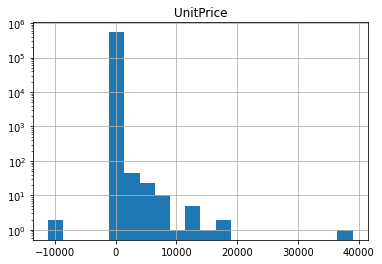

In [13]:
orders.hist(column=['UnitPrice'], log=True, bins=20)

In [14]:
orders.UnitPrice.fillna(orders.UnitPrice.median())
orders.UnitPrice.isna().sum()

0

**Observation:** The UnitPrice directly affects the Total Price and we cannot simply drop these rows since they might hold valuable data. The data is right skewed and so to perform an imputation where we replace the zero values, we should use the median as opposed to the mean which is easily affected by outliers

- Dealing with negative values

In [15]:
(orders.select_dtypes(np.number) < 0).sum()

Quantity      10624
UnitPrice         2
CustomerID        0
TotalPrice     9290
dtype: int64

In [16]:
orders[orders['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [17]:
orders[orders['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06


In [18]:
orders = orders[orders['UnitPrice'] > 0]

**Observation:** The negative values in Quantity are due to cancelled orders and can remain as is. The negative values in UnitPrice are because of bad debt and can be removed since they will affect the TotalPrice

- Dealing with missing values

In [19]:
orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
orders[orders['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,14.94
...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79


In [21]:
orders.drop(['CustomerID'], axis=1, inplace=True)
orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


**Observation:** Since the InvoiceNo column mirrors a unique identifier for the CustomerID, we can safely drop the column from our dataframe

**<u>3. Data Exploration & Visualization</u>**

- 🗺️ **Explore**: Negative order quantities indicate returns. Which products have been returned the most?
- 📊 **Visualize**: Create a plot visualizing the profits earned from UK customers weekly, monthly, and quarterly.
- 🔎 **Analyze**: Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

In [22]:
# Create Year, Month and Day columns from datetime InvoiceDate column
orders['Year'] = orders['InvoiceDate'].dt.year
orders['Month'] = orders['InvoiceDate'].dt.month
orders['Week'] = orders['InvoiceDate'].dt.weekday
orders['Date'] = orders['InvoiceDate'].dt.time
orders['Hour'] = orders['InvoiceDate'].dt.hour

In [23]:
# Create a column highlighting whether an order was completed or cancelled
orders['OrderStatus'] = orders['Quantity'].apply(lambda s:'Cancelled' if s < 0 else 'Purchased')

<AxesSubplot:xlabel='OrderStatus', ylabel='count'>

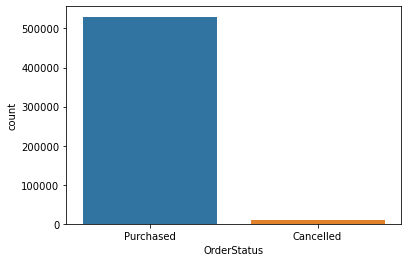

In [24]:
sns.countplot(x=orders['OrderStatus'])

In [25]:
# Subset dataframe of purchased orders
purchased = orders[orders['OrderStatus'] == 'Purchased']
# Subset dataframe of returned orders
returned = orders[orders['OrderStatus'] == 'Cancelled']

Which products have been returned the most?

In [26]:
returned_products = returned[['Description','StockCode']].value_counts().to_frame(name='Number of Returns')
returned_products

,,Number of Returns
Description,StockCode,
Manual,M,244
REGENCY CAKESTAND 3 TIER,22423,181
POSTAGE,POST,126
JAM MAKING SET WITH JARS,22960,87
Discount,D,77
...,...,...
MAGIC GARDEN FELT GARLAND,22246,1
MAGIC SHEEP WOOL GROWING FROM PAPER,84012,1
MAGIC TREE -PAPER FLOWERS,84006,1


Find the most commonly sold products

In [27]:
purchased_products = purchased[['Description','StockCode']].value_counts().to_frame(name='Units Sold')
purchased_products

,,Units Sold
Description,StockCode,
WHITE HANGING HEART T-LIGHT HOLDER,85123A,2256
JUMBO BAG RED RETROSPOT,85099B,2112
REGENCY CAKESTAND 3 TIER,22423,2017
PARTY BUNTING,47566,1706
LUNCH BAG RED RETROSPOT,20725,1594
...,...,...
ORANGE FELT VASE + FLOWERS,84743C,1
BLACK CHRISTMAS FLOCK DROPLET,35610B,1
BLACK CHERRY LIGHTS,79323B,1


What are the sales earned by country?

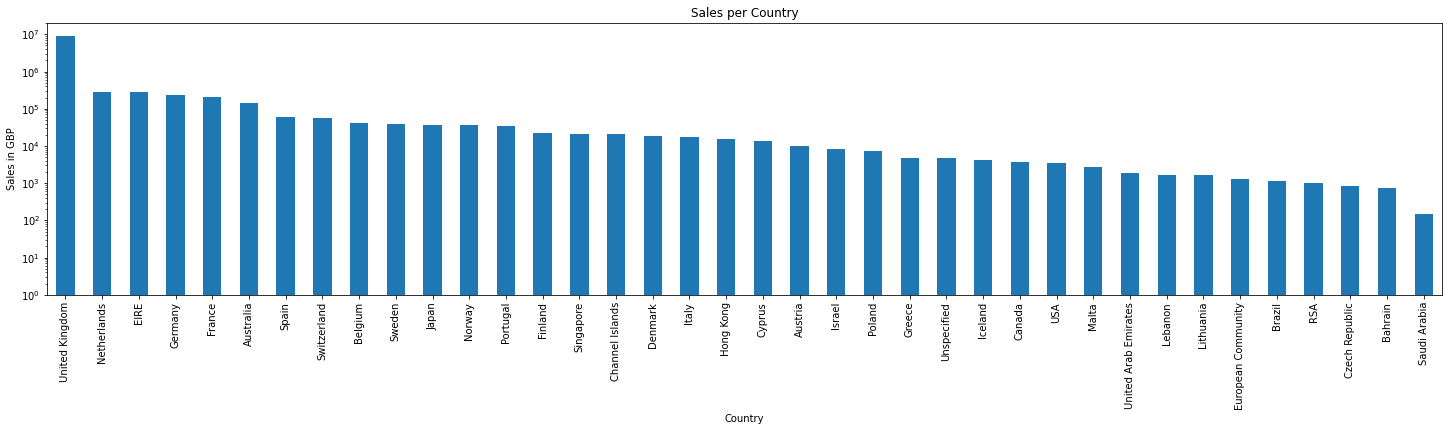

In [28]:
profits = purchased.groupby(by='Country')[['Quantity', 'TotalPrice']].agg('sum').sort_values(by='TotalPrice', ascending=False)
profits['TotalPrice'].plot(kind='bar', log=True, figsize=(25,5), title='Sales per Country', ylabel='Sales in GBP')
plt.show()

Best Month for sales in the UK?

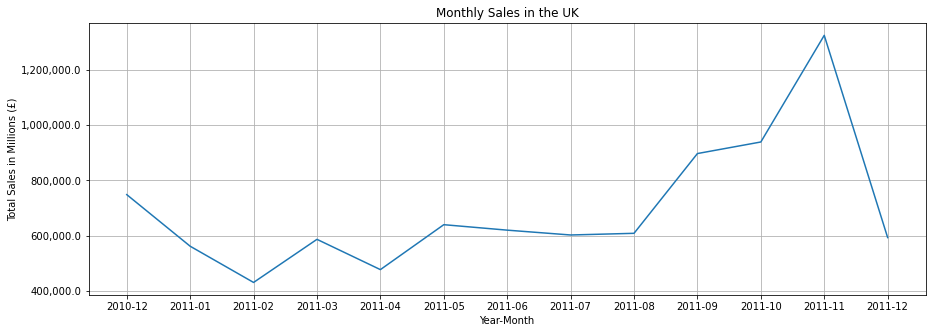

In [29]:
from matplotlib.ticker import StrMethodFormatter

# create a df of products sold to the UK
uk = purchased[purchased['Country'] == 'United Kingdom'].sort_values(by='InvoiceDate')

# group and plot data
uk_month = uk.groupby(by=['Year', 'Month']).sum()
ax = uk_month['TotalPrice'].plot(figsize=(15,5),title='Monthly Sales in the UK', ylabel='Total Sales in Millions (£)', xlabel='Year-Month')

# format the x and y axes
ax.set_xticks(range(len(uk_month['TotalPrice'])))
ax.set_xticklabels(["%s-%02d" % item for item in uk_month.TotalPrice.index.tolist()])
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

plt.show()

What time should we put up ads on the website?

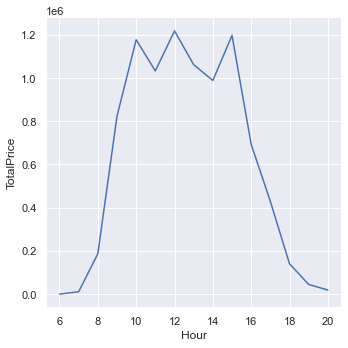

In [30]:
time_df = uk[['Year', 'Month', 'Date', 'Hour', 'TotalPrice']]
sales_per_hour = time_df.groupby(by='Hour')['TotalPrice'].agg('sum').to_frame()
sns.set_theme()
sns.relplot(x=sales_per_hour.index, y='TotalPrice', data=sales_per_hour, kind='line')

Which day has the highest number of orders?

In [31]:
purchased

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice,Year,Month,Week,Date,Hour,OrderStatus
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010,12,2,08:26:00,8,Purchased
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,2,08:26:00,8,Purchased
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010,12,2,08:26:00,8,Purchased
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,2,08:26:00,8,Purchased
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,2,08:26:00,8,Purchased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20,2011,12,4,12:50:00,12,Purchased
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60,2011,12,4,12:50:00,12,Purchased
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60,2011,12,4,12:50:00,12,Purchased
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60,2011,12,4,12:50:00,12,Purchased


<AxesSubplot:>

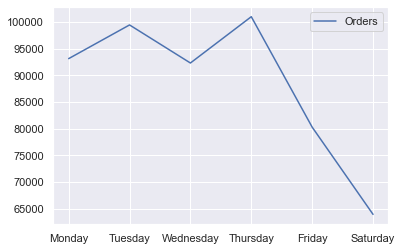

In [78]:
index = pd.Index(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
week_orders = purchased.Week.value_counts().sort_index().to_frame(name='Orders')
week_orders = week_orders.set_index(index)
week_orders.plot()